## Exposicion ANPI
### Darío Rodríguez Obando
### Jonathan Guzmán Araya
### Problema General a Resolver

Un Transistor de Union Bipolar o BJT, es un componente electrónico, que funciona con diferentes concentraciones de sus áreas, y estas establecen el tipo de transitor que es, en este caso de estudiará un BJT tipo NPN.\
\
Existen varias formas de polarizar el transistor, de manera que su función cambia, se utilizará la region activa para su análisis.\
\
El transistor tiene 3 conexiones, donde sus corrientes varían dependiendo de su polarización y su diseño. Para realizar el diseño de Circuitos, se necesita conocer las corrientes de cada una de sus conexiones las cuales se nombran: Emisor, Base y Colector.
<div>
<img src="https://www.cdmxelectronica.com/wp-content/uploads/2N2222-NPN.png" width="300"/>
</div>


### Problema Matemático a Resolver


Para calcular las corrientes, se necesitan los valores de fábrica de $I_{s}$, $\beta$. Además, por estar en la región activa, se puede asumir $V_{BE}$ como $0.8$ v, y el valor de $V_{t}$ es $26mv$. \
\
Para la Corriente del colector, se utiliza la siguiente ecuación:\
\
$I_{C}= I_{s}⋅e^{V_{BE}/V_{t}}$\
\
$I_{B}= \frac{I_{c}}{\beta}$\
\
$I_{E}= \frac{\beta + 1}{\beta} ⋅ I_{C}$\
El valor que se debe iterar es $V_{BE}$ debido a que se asume un valor inicial y se debe calcular el valor más exacto.

### Método numérico utilizado para resolver el problema
\
Utilizamos el método de Newton-Raphson, para resolver el problema.

### Pseudocódigo

1) Se asume el valor de $V_{BE} = 0.8$ como un valor inicial para obtener el primer valor de $I_{C}$.

2) Se calcula el valor de $I_{C}$  mediante la ecuación : $I_{C}= I_{s}⋅e^{V_{BE}/V_{t}}$.

3) Del valor obtenido, se obtiene un $V_{BE}$ más cercano al valor real usando $V_{t}⋅ln(\frac{I_{C}}{I_{S}})$

4) Se vuelve a iterar las veces necesarias.


x =  0.00065455
x =  0.00068845
x =  0.00068785
x =  0.00068786
x =  0.00068786
x =  0.00068786
x =  0.00068786
x =  0.00068786
x =  0.00068786
Vbe =  0.72670
Ic =  0.00068786
Ib =  0.0000068786
Ie =  0.00069474
no_iterations =  9


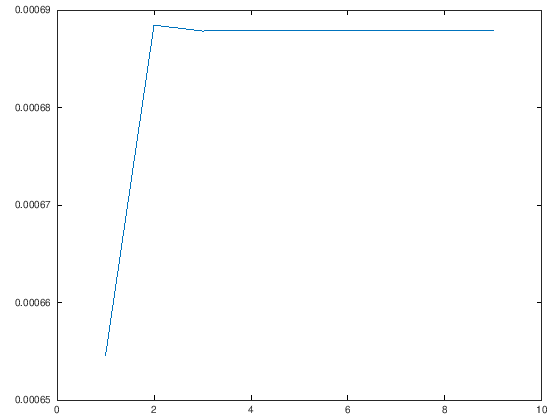

In [63]:
function Newtons_method()
    Is=5e-16;
    Vbe=0.8;
    f = @(x,Vbe) x*(10*((0.026/x)+200)+200)-(2.5-Vbe);
    dfdx = 2200;
    eps = 10e-100;
    beta=100;
    x0 = 0.001;
    [Ic, no_iterations,Vbe] = Newton(f, dfdx, x0, eps,Is,Vbe,beta);
end

function [Ic, no_iterations,Vbe] = Newton(f, dfdx, x0, eps,Is,Vbe,beta)
    x = x0;
    f_value = f(x,Vbe);
    iteration_counter = 1;
    X_values = [];
    while abs(f_value) > eps && iteration_counter < 10
        x = x - (f_value)/dfdx
        X_values=[X_values x];
        Vbe=0.026*log(x/Is);
        f_value = f(x,Vbe);
        iteration_counter = iteration_counter + 1;
    end
    Vbe
    Ic = x
    Ib = Ic/beta
    Ie = ((beta + 1)/beta)*Ic
    no_iterations = iteration_counter -1
    plot(1:no_iterations,X_values)

end

Newtons_method()